In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import copy
import matplotlib.pyplot as plt
from iaml01cw2_helpers import load_CoVoST2 
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, ward, single, complete
from sklearn.mixture import GaussianMixture

In [33]:
sys.path.append('/Users/thatsmilersmiles/Desktop/cw2/INFR10069-2020-CW2-main/helpers')
path = '/Users/thatsmilersmiles/Desktop/cw2/INFR10069-2020-CW2-main/data/'
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2(path)

3.1

In [34]:
#3.1
kmeans = KMeans(n_clusters = 22, random_state = 1).fit(Xtrn)
print("Sum of squared distances: {0:.3f}".format(kmeans.inertia_))
for i in range(len(np.unique(Ytrn))):
    n_i = len(np.where(kmeans.labels_ == i)[0])
    print("Number of samples for cluster {}: {}".format(i, n_i))

Sum of squared distances: 38185.817
Number of samples for cluster 0: 1018
Number of samples for cluster 1: 1125
Number of samples for cluster 2: 1191
Number of samples for cluster 3: 890
Number of samples for cluster 4: 1162
Number of samples for cluster 5: 1332
Number of samples for cluster 6: 839
Number of samples for cluster 7: 623
Number of samples for cluster 8: 1400
Number of samples for cluster 9: 838
Number of samples for cluster 10: 659
Number of samples for cluster 11: 1276
Number of samples for cluster 12: 121
Number of samples for cluster 13: 152
Number of samples for cluster 14: 950
Number of samples for cluster 15: 1971
Number of samples for cluster 16: 1251
Number of samples for cluster 17: 845
Number of samples for cluster 18: 896
Number of samples for cluster 19: 930
Number of samples for cluster 20: 1065
Number of samples for cluster 21: 1466


3.2

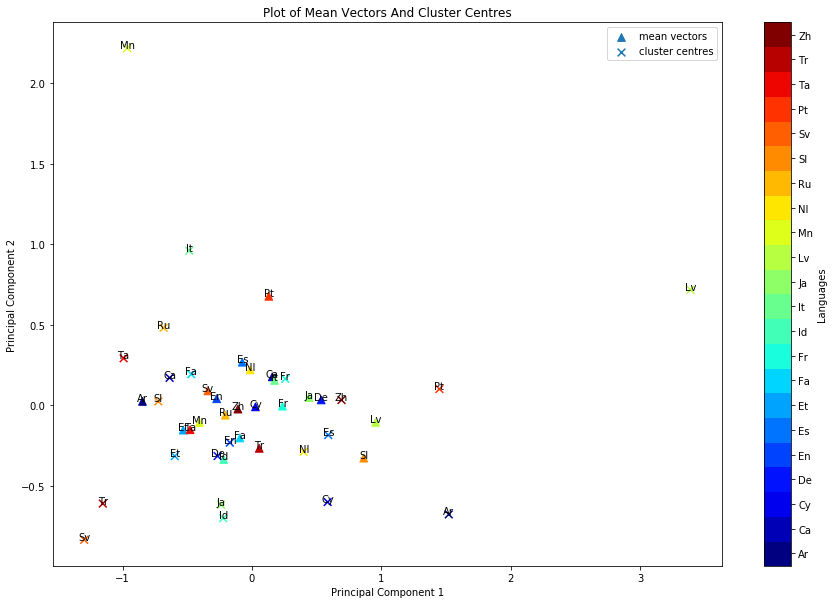

In [35]:
#3.2
kmeans = KMeans(n_clusters = 22, random_state = 1).fit(Xtrn)
meansv = []
for i in range(len(np.unique(Ytrn))):
    idx = np.where(Ytrn == i)
    sample = Xtrn[idx]
    meansv = np.append(meansv, np.mean(sample, 0))
meansv = meansv.reshape(22, 26)
pca = PCA(n_components = 2)
X_means = pca.fit_transform(meansv) 
X_centers = pca.fit_transform(kmeans.cluster_centers_)
x = X_means[:, 0]
y = X_means[:, 1]
x1 = X_centers[:, 0]
y1 = X_centers[:, 1]
languages = ['Ar', 'Ca', 'Cy', 'De', 'En', 'Es', 'Et', 'Fa', 'Fr', 'Id', 'It', 'Ja', 'Lv', 'Mn', 'Nl', 
 'Ru', 'Sl', 'Sv', 'Pt', 'Ta', 'Tr', 'Zh']
plt.subplots(figsize = (15, 10))
scatter = plt.scatter(x, y, s = 60, c = np.arange(22), marker = '^', label = 'mean vectors', cmap = plt.cm.get_cmap('jet', 22))
scatter = plt.scatter(x1, y1, s = 60, c = np.arange(22), marker = 'x', label = 'cluster centres', cmap = plt.cm.get_cmap('jet', 22))
plt.title('Plot of Mean Vectors And Cluster Centres')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, l in enumerate(languages):
    plt.annotate(l, (X_means[i][0], X_means[i][1]), ha = 'center')
for i, l in enumerate(languages):
    plt.annotate(l, (X_centers[i][0], X_centers[i][1]), ha = 'center')
cbar = plt.colorbar(scatter, ticks = range(22), label = 'Languages')
plt.clim(-0.5, 21.5)
cbar.set_ticklabels(languages)
plt.legend(loc = 'upper right')
plt.show()

3.3

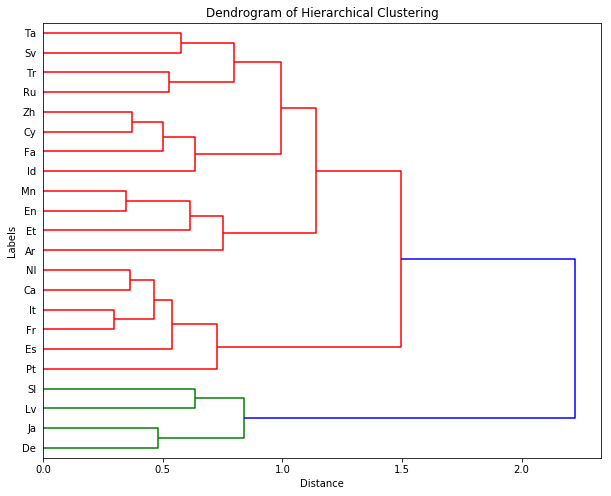

In [36]:
#3.3
meansv = []
n_clusters = len(np.unique(Ytrn))
for i in range(n_clusters):
    idx = np.where(Ytrn == i)
    sample = Xtrn[idx]
    meansv = np.append(meansv, np.mean(sample, 0))
meansv = meansv.reshape(22, 26)
Z = ward(meansv)
languages = ['Ar', 'Ca', 'Cy', 'De', 'En', 'Es', 'Et', 'Fa', 'Fr', 'Id', 'It', 'Ja', 'Lv', 'Mn', 'Nl', 
 'Ru', 'Sl', 'Sv', 'Pt', 'Ta', 'Tr', 'Zh']
plt.figure(figsize = (10, 8))
dendrogram(Z, orientation = 'right', labels = languages)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Distance')
plt.ylabel('Labels')
plt.show()

3.4

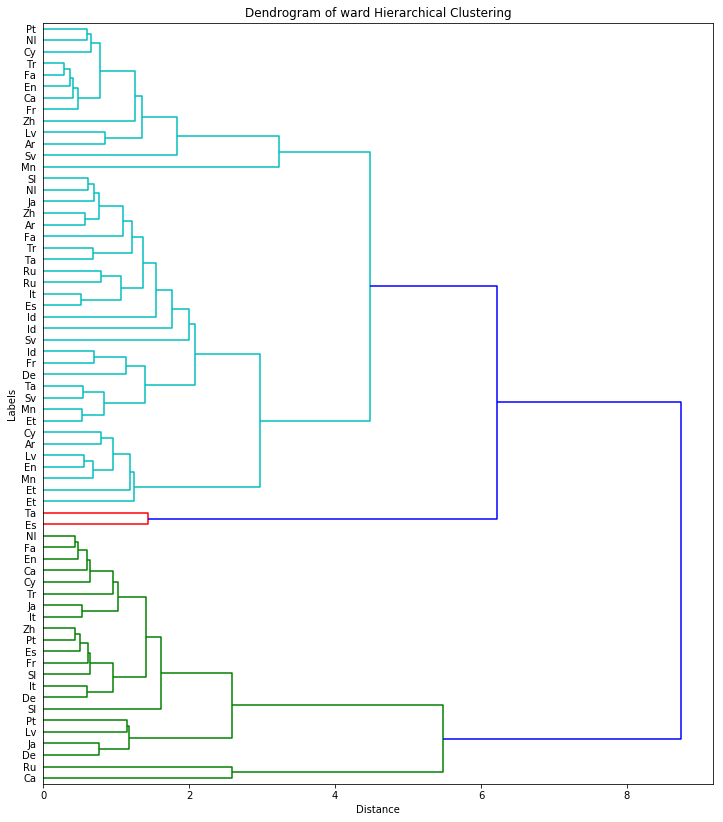

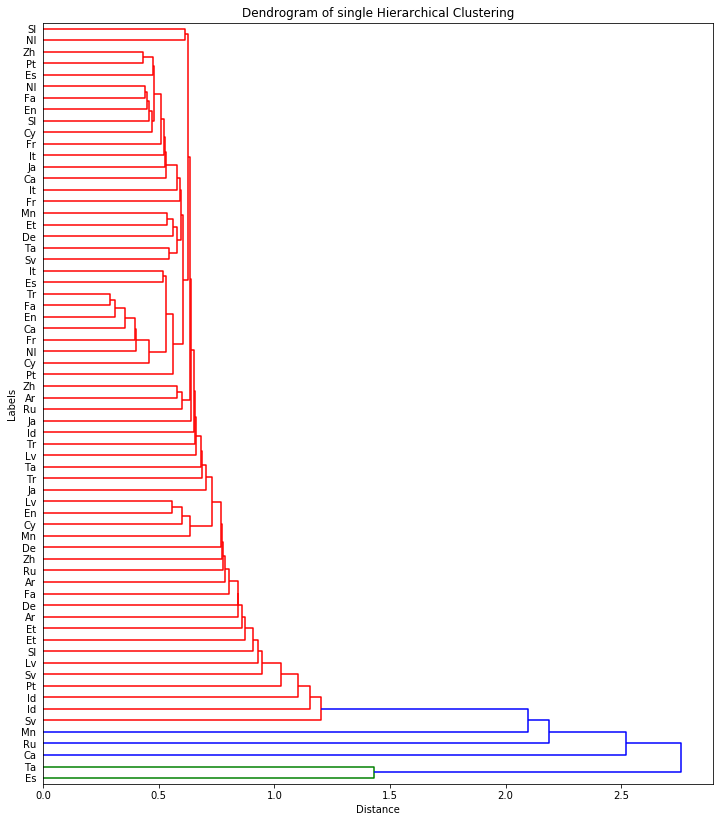

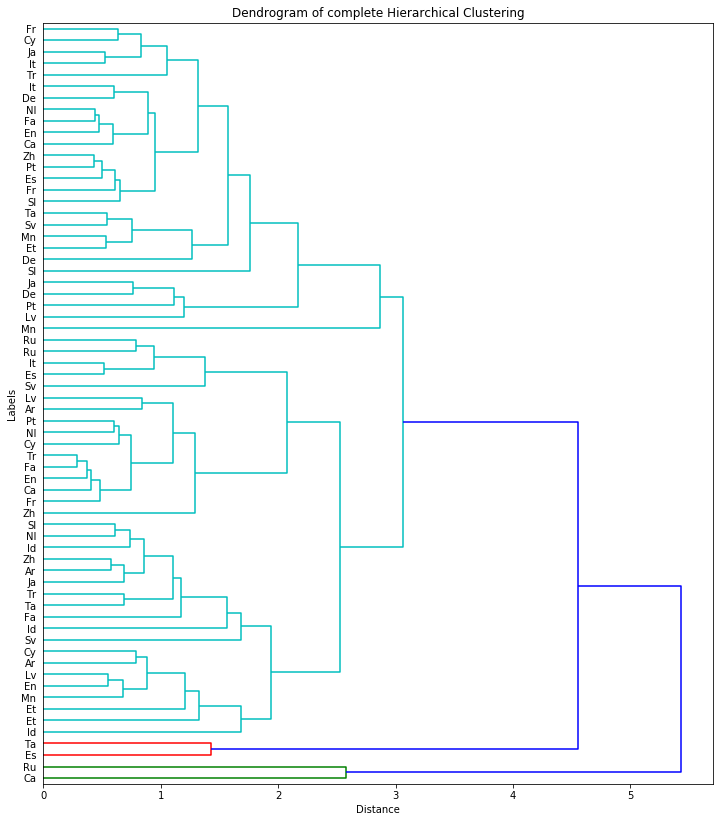

In [37]:
#3.4
vectors = []
for i in range(len(np.unique(Ytrn))):
    idx = np.where(Ytrn == i)
    sample = Xtrn[idx]
    kmeans = KMeans(n_clusters = 3, random_state = 1)
    kmeans.fit_transform(sample)
    centers = kmeans.cluster_centers_
    for c in centers:
        vectors = np.append(vectors, c)
vectors = vectors.reshape(66, 26)
languages = ['Ar', 'Ar', 'Ar', 'Ca', 'Ca', 'Ca', 'Cy', 'Cy', 'Cy', 'De', 'De', 'De', 'En', 'En', 'En',
             'Es', 'Es', 'Es', 'Et', 'Et', 'Et', 'Fa', 'Fa', 'Fa', 'Fr', 'Fr', 'Fr', 'Id', 'Id', 'Id',
             'It', 'It', 'It', 'Ja', 'Ja', 'Ja', 'Lv', 'Lv', 'Lv', 'Mn', 'Mn', 'Mn', 'Nl', 'Nl', 'Nl',
             'Ru', 'Ru', 'Ru', 'Sl', 'Sl', 'Sl', 'Sv', 'Sv', 'Sv', 'Pt', 'Pt', 'Pt', 'Ta', 'Ta', 'Ta', 
             'Tr', 'Tr', 'Tr', 'Zh', 'Zh', 'Zh']
methods = ['ward', 'single', 'complete']
for m in range(len(methods)):
    plt.figure(figsize = (12, 14))
    dendrogram(linkage(vectors, methods[m]), orientation = 'right', labels = languages)
    ax = plt.gca()
    ax.tick_params(axis = 'y', which = 'major', labelsize = 10)
    plt.title('Dendrogram of {} Hierarchical Clustering'.format(methods[m]))
    plt.xlabel('Distance')
    plt.ylabel('Labels')
    plt.show()
    

3.5

K: 1, covariance matrix type: diagonal, training likelihood: 14.280416117561785
K: 1, covariance matrix type: diagonal, testing likelihood: 13.842923924145325
--------------
K: 1, covariance matrix type: full, training likelihood: 16.39360043614829
K: 1, covariance matrix type: full, testing likelihood: 15.810511543142642
--------------
K: 3, covariance matrix type: diagonal, training likelihood: 15.39842974321434
K: 3, covariance matrix type: diagonal, testing likelihood: 15.040748265063941
--------------
K: 3, covariance matrix type: full, training likelihood: 18.086004938145162
K: 3, covariance matrix type: full, testing likelihood: 17.066076255632257
--------------
K: 5, covariance matrix type: diagonal, training likelihood: 16.010388761796378
K: 5, covariance matrix type: diagonal, testing likelihood: 15.90854610007615
--------------
K: 5, covariance matrix type: full, training likelihood: 19.035723951918733
K: 5, covariance matrix type: full, testing likelihood: 16.48942646374156

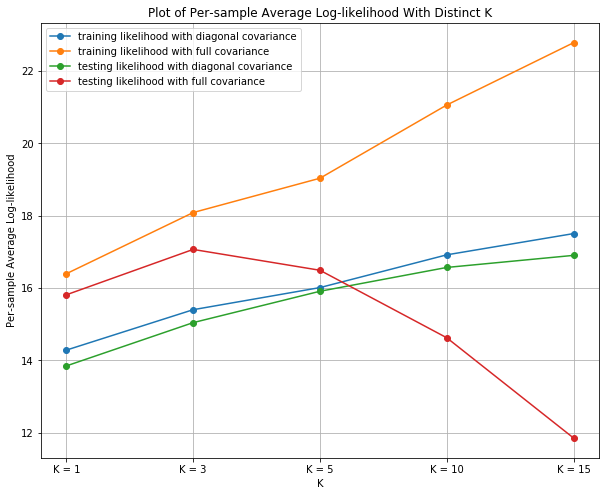

In [39]:
#3.5
idx_trn = np.where(Ytrn == 0)
idx_tst = np.where(Ytst == 0)
sample_trn = Xtrn[idx_trn]
sample_tst = Xtst[idx_tst]
Ks = [1, 3, 5, 10, 15]
ks = np.arange(5)
labels = ['K = 1', 'K = 3', 'K = 5', 'K = 10', 'K = 15']
score_trn_diag = []
score_trn_full = []
score_tst_diag = []
score_tst_full = []

for k in Ks:
    gmm = GaussianMixture(n_components = k, covariance_type = 'diag', random_state = 1)   
    gmm.fit(sample_trn)
    score_trn_diag = np.append(score_trn_diag, gmm.score(sample_trn)) 
    score_tst_diag = np.append(score_tst_diag, gmm.score(sample_tst)) 
for k in Ks:
    gmm = GaussianMixture(n_components = k, covariance_type = 'full', random_state = 1)   
    gmm.fit(sample_trn)
    score_trn_full = np.append(score_trn_full, gmm.score(sample_trn)) 
    score_tst_full = np.append(score_tst_full, gmm.score(sample_tst))
    
for k in range(len(Ks)):
        print("K: {}, covariance matrix type: diagonal, training likelihood: {}".format(Ks[k], score_trn_diag[k]))                
        print("K: {}, covariance matrix type: diagonal, testing likelihood: {}".format(Ks[k], score_tst_diag[k]))
        print("--------------")
        print("K: {}, covariance matrix type: full, training likelihood: {}".format(Ks[k], score_trn_full[k]))                
        print("K: {}, covariance matrix type: full, testing likelihood: {}".format(Ks[k], score_tst_full[k]))
        print("--------------")

plt.figure(figsize = (10, 8))
plt.plot(score_trn_diag, 'o-', label = 'training likelihood with diagonal covariance')
plt.plot(score_trn_full, 'o-', label = 'training likelihood with full covariance')
plt.plot(score_tst_diag, 'o-', label = 'testing likelihood with diagonal covariance')
plt.plot(score_tst_full, 'o-', label = 'testing likelihood with full covariance')
plt.title('Plot of Per-sample Average Log-likelihood With Distinct K')
plt.xlabel('K')
plt.ylabel('Per-sample Average Log-likelihood')
plt.xticks(ks, labels)
plt.grid()
plt.legend()
plt.show()